### Latency estimation for message passing in AR demo

We are going to estimate the latency when sending message inside the application. In order to estimate the latency, since there is no time synchronization between clients (or between client and server), we estimate the time it takes for a client to receive the notification of an event that was generated by the client itself.
This is possible because when a client generates an event for every user, it will also receive a notification of the event from the server. That is, client A generated the event and sends a message to the server, which in turns notifies all the clients (including client A) of the event. We ran the experiment in two different sessions (once using a tablet as client, and the second time using a smartphone), generating around 400 messages.

In [66]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
DATA_FOLDER = Path('./data')
LATENCY_FILE_PHONE = Path(DATA_FOLDER / Path('latency_phone.txt'))
LATENCY_FILE_TABLET = Path(DATA_FOLDER / Path('latency_tablet.txt'))

Let's open the files and strip the unnecessary info, keeping only the latency measurements (in milliseconds)

In [22]:
with open(LATENCY_FILE_PHONE) as f:
    lines_phone = f.readlines()
    lines_phone.pop(0) # AGENT id
    lines_phone = [line[line.index(':')+2:] for line in lines_phone]
    lines_phone = [line[:line.index('m')-1] for line in lines_phone]

with open(LATENCY_FILE_TABLET) as f:
    lines_tablet = f.readlines()
    lines_tablet.pop(0) # AGENT id
    lines_tablet = [line[line.index(':')+2:] for line in lines_tablet]
    lines_tablet = [line[:line.index('m')-1] for line in lines_tablet]   

Now we remove from *lines_phone* the few values equal to zero (a mistake which occurred in the data collection) and plot the histogram of values

In [24]:
#first convert to int
lines_phone = list(map(int, lines_phone))
lines_tablet = list(map(int, lines_tablet))

lines_phone = [i for i in lines_phone if i != 0]

In [31]:
df_phone = pd.DataFrame(lines_phone, columns=['latency phone (ms)'])
df_tablet = pd.DataFrame(lines_tablet, columns=['latency tablet (ms)'])

In [32]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   latency phone (ms)  120 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB


In [33]:
df_tablet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   latency tablet (ms)  289 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


Let's plot two histograms

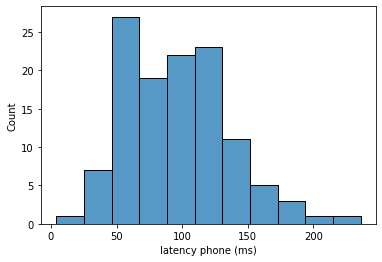

In [34]:
sns.histplot(data=df_phone, x='latency phone (ms)')

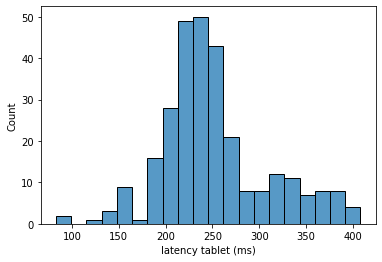

In [36]:
sns.histplot(data=df_tablet, x='latency tablet (ms)')

And let's print out the mean and the median for the latencies.

In [41]:
print(f'PHONE: The mean latency value is {df_phone["latency phone (ms)"].mean():.2f} and the median is {df_phone["latency phone (ms)"].median():.2f}')
print(f'TABLET: The mean latency value is {df_tablet["latency tablet (ms)"].mean():.2f} and the median is {df_tablet["latency tablet (ms)"].median():.2f}')

PHONE: The mean latency value is 96.59 and the median is 96.50
TABLET: The mean latency value is 250.99 and the median is 242.00


Let's now combine the data and print median and mean, before pltting the histogram

The mean latency is 205.69 and the median is 222.00


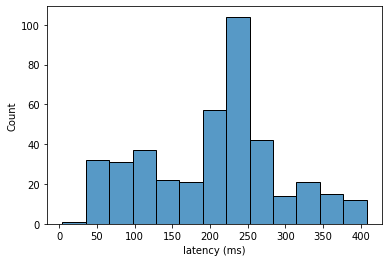

In [42]:
all_latencies = lines_phone + lines_tablet
df = pd.DataFrame(all_latencies, columns=['latency (ms)'])
print(f'The mean latency is {df["latency (ms)"].mean():.2f} and the median is {df["latency (ms)"].median():.2f}')
sns.histplot(data=df, x='latency (ms)')      

In [43]:
df_phone["latency phone (ms)"].max()

236

### Latency for xAPI statements

In this case we do not need to estimate the latency, as we can accurately measure the difference between the time a statement is sent and the time it is stored in Learning Locker. The client and server are time is synchronized, so we can just measure the difference in the timestamps.

In [47]:
FILE_TIME_SENT = Path(DATA_FOLDER / 'times_sent.txt')
FILE_TIME_RECEIVED = Path(DATA_FOLDER / 'times_LL.csv')

In [133]:
# with open(FILE_TIME_SENT) as f:
#     send_time = f.readlines()
    
# send_time = [s.strip() for s in send_time]
# send_time = send_time[::-1] #revert order

df_send = pd.read_csv(FILE_TIME_SENT, sep=':', header=None, names=['hh', 'mm', 'ss', 'ms'], dtype='string')
df_send['Date'] = '12-10-2021'
#df_send['hh'] = df_send['hh'] - 1 # compensate timezone
df_send['mm'] = df_send['mm'].str.zfill(2)
df_send['ss'] = df_send['ss'].str.zfill(2)
df_send['ms'] = df_send['ms'].str.zfill(3)
df_send['hh'] = df_send['hh'].astype("string")
df_send['Time'] = df_send['hh'] + ':' + df_send['mm'] + ':' + df_send['ss'] +'.' + df_send['ms']

df_send['timestamp_send'] = pd.to_datetime(df_send['Date'] + ' ' + df_send['Time'])

df_send = df_send[::-1].reset_index()
df_send.drop('index', axis=1, inplace=True)
df_send.head()

,hh,mm,ss,ms,Date,Time,timestamp_send
0,14,06,39,191,12-10-2021,14:06:39.191,2021-12-10 14:06:39.191
1,14,06,39,074,12-10-2021,14:06:39.074,2021-12-10 14:06:39.074
2,14,06,38,954,12-10-2021,14:06:38.954,2021-12-10 14:06:38.954
3,14,06,38,836,12-10-2021,14:06:38.836,2021-12-10 14:06:38.836
4,14,06,38,718,12-10-2021,14:06:38.718,2021-12-10 14:06:38.718


In [134]:
df_rec = pd.read_csv(FILE_TIME_RECEIVED, header=0)
df_rec['timestamp_rec'] = df_rec['timestamp'].astype('datetime64[ns]')


In [135]:
df_rec.head()

,_id,timestamp,timestamp_rec
0,61b350df3fe64d06235e9139,2021-12-10T13:06:39.337Z,2021-12-10 13:06:39.337
1,61b350df3fe64d06235e9138,2021-12-10T13:06:39.219Z,2021-12-10 13:06:39.219
2,61b350df3fe64d06235e9137,2021-12-10T13:06:39.101Z,2021-12-10 13:06:39.101
3,61b350de3fe64d06235e9136,2021-12-10T13:06:38.983Z,2021-12-10 13:06:38.983
4,61b350de3fe64d06235e9135,2021-12-10T13:06:38.864Z,2021-12-10 13:06:38.864


In [136]:
df = pd.concat([df_send, df_rec], axis=1, join='inner')
df.head()

,hh,mm,ss,ms,Date,Time,timestamp_send,_id,timestamp,timestamp_rec
0,14,06,39,191,12-10-2021,14:06:39.191,2021-12-10 14:06:39.191,61b350df3fe64d06235e9139,2021-12-10T13:06:39.337Z,2021-12-10 13:06:39.337
1,14,06,39,074,12-10-2021,14:06:39.074,2021-12-10 14:06:39.074,61b350df3fe64d06235e9138,2021-12-10T13:06:39.219Z,2021-12-10 13:06:39.219
2,14,06,38,954,12-10-2021,14:06:38.954,2021-12-10 14:06:38.954,61b350df3fe64d06235e9137,2021-12-10T13:06:39.101Z,2021-12-10 13:06:39.101
3,14,06,38,836,12-10-2021,14:06:38.836,2021-12-10 14:06:38.836,61b350de3fe64d06235e9136,2021-12-10T13:06:38.983Z,2021-12-10 13:06:38.983
4,14,06,38,718,12-10-2021,14:06:38.718,2021-12-10 14:06:38.718,61b350de3fe64d06235e9135,2021-12-10T13:06:38.864Z,2021-12-10 13:06:38.864


In [137]:
df.drop(df.columns[[0, 1, 2, 3, 4, 5, 7]], axis='columns', inplace=True)

In [138]:
df.head()

,timestamp_send,timestamp,timestamp_rec
0,2021-12-10 14:06:39.191,2021-12-10T13:06:39.337Z,2021-12-10 13:06:39.337
1,2021-12-10 14:06:39.074,2021-12-10T13:06:39.219Z,2021-12-10 13:06:39.219
2,2021-12-10 14:06:38.954,2021-12-10T13:06:39.101Z,2021-12-10 13:06:39.101
3,2021-12-10 14:06:38.836,2021-12-10T13:06:38.983Z,2021-12-10 13:06:38.983
4,2021-12-10 14:06:38.718,2021-12-10T13:06:38.864Z,2021-12-10 13:06:38.864


In [139]:
df = df.astype('datetime64[ns]')

In [140]:
df['timestamp_rec'] = df['timestamp_rec'] + pd.Timedelta(hours=1) #compensate timezone


In [141]:
df['diff'] = df['timestamp_rec'] - df['timestamp_send']

In [142]:
df.head()

,timestamp_send,timestamp,timestamp_rec,diff
0,2021-12-10 14:06:39.191,2021-12-10 13:06:39.337,2021-12-10 14:06:39.337,0 days 00:00:00.146000
1,2021-12-10 14:06:39.074,2021-12-10 13:06:39.219,2021-12-10 14:06:39.219,0 days 00:00:00.145000
2,2021-12-10 14:06:38.954,2021-12-10 13:06:39.101,2021-12-10 14:06:39.101,0 days 00:00:00.147000
3,2021-12-10 14:06:38.836,2021-12-10 13:06:38.983,2021-12-10 14:06:38.983,0 days 00:00:00.147000
4,2021-12-10 14:06:38.718,2021-12-10 13:06:38.864,2021-12-10 14:06:38.864,0 days 00:00:00.146000


In [143]:
df['delay'] = df['diff'].astype(np.int64) / int(1e6)


In [144]:
df.head()

,timestamp_send,timestamp,timestamp_rec,diff,delay
0,2021-12-10 14:06:39.191,2021-12-10 13:06:39.337,2021-12-10 14:06:39.337,0 days 00:00:00.146000,146.0
1,2021-12-10 14:06:39.074,2021-12-10 13:06:39.219,2021-12-10 14:06:39.219,0 days 00:00:00.145000,145.0
2,2021-12-10 14:06:38.954,2021-12-10 13:06:39.101,2021-12-10 14:06:39.101,0 days 00:00:00.147000,147.0
3,2021-12-10 14:06:38.836,2021-12-10 13:06:38.983,2021-12-10 14:06:38.983,0 days 00:00:00.147000,147.0
4,2021-12-10 14:06:38.718,2021-12-10 13:06:38.864,2021-12-10 14:06:38.864,0 days 00:00:00.146000,146.0


In [148]:
df.delay.dtype
print(f'The mean latency value is {df["delay"].mean():.2f} and the max is {df["delay"].max():.2f}')

The mean latency value is 144.97 and the max is 314.00
